In [1]:
import pandas as pd 

import numpy as np

In [2]:
train_data=pd.read_csv('../input/titanic/train.csv')
test_data=pd.read_csv('../input/titanic/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_data.shape,train_data.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Data_Preprocessing**

In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
columns=['PassengerId','Ticket','Name','Cabin']
train_data.drop(columns,axis=1,inplace=True)
test_data.drop(columns,axis=1,inplace=True)


In [10]:
#mapping some columns
train_data['Sex']=train_data['Sex'].map({'male':1,'female':0})
#mapping some columns
test_data['Sex']=test_data['Sex'].map({'male':1,'female':0})

In [11]:
embarked_new=pd.get_dummies(train_data['Embarked'],prefix='Embarked',drop_first=True)
train_data=pd.concat([train_data,embarked_new],axis=1)
embarked_new1=pd.get_dummies(test_data['Embarked'],prefix='Embarked',drop_first=True)
test_data=pd.concat([test_data,embarked_new1],axis=1)

In [12]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,Q,1,0
1,3,0,47.0,1,0,7.0000,S,0,1
2,2,1,62.0,0,0,9.6875,Q,1,0
3,3,1,27.0,0,0,8.6625,S,0,1
4,3,0,22.0,1,1,12.2875,S,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,S,0,1
414,1,0,39.0,0,0,108.9000,C,0,0
415,3,1,38.5,0,0,7.2500,S,0,1
416,3,1,NaN,0,0,8.0500,S,0,1


In [13]:
train_data.drop('Embarked',axis=1,inplace=True)
test_data.drop('Embarked',axis=1,inplace=True)

In [14]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())

In [15]:
train_data.isnull().sum(),train_data.head()

(Survived      0
 Pclass        0
 Sex           0
 Age           0
 SibSp         0
 Parch         0
 Fare          0
 Embarked_Q    0
 Embarked_S    0
 dtype: int64,
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
 0         0       3    1  22.0      1      0   7.2500           0           1
 1         1       1    0  38.0      1      0  71.2833           0           0
 2         1       3    0  26.0      0      0   7.9250           0           1
 3         1       1    0  35.0      1      0  53.1000           0           1
 4         0       3    1  35.0      0      0   8.0500           0           1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import scale


In [17]:
y=train_data['Survived']
x=train_data.drop('Survived',axis=1)

In [18]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [20]:
model=SVC(C=1,kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [21]:
#model evaluation
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)
print("accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))


accuracy: 0.6312849162011173
Precision: 0.6666666666666666
Recall: 0.24


In [22]:
#create a Kfold object with the splits
folds=KFold(n_splits=4,shuffle=True,random_state=4)
#specify the range of the hyperparameters
#set the parameters by the cross validation
hyper_params=[{'gamma':[1e-2,1e-3,1e-4],
              "C":[1,10,100,1000]}]
#specify model
model=SVC(kernel='rbf')
#set the grid searchcv
model_cv=GridSearchCV(estimator=model,param_grid=hyper_params,
                      scoring='accuracy',
                      verbose=1,
                      return_train_score=True)
#fit the model
model_cv.fit(x_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [23]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016472,0.000835,0.005788,0.000745,1,0.01,"{'C': 1, 'gamma': 0.01}",0.727273,0.713287,0.718310,...,0.710647,0.037557,9,0.764499,0.755712,0.757895,0.749123,0.770175,0.759481,0.007260
1,0.015388,0.000169,0.005127,0.000047,1,0.001,"{'C': 1, 'gamma': 0.001}",0.741259,0.720280,0.683099,...,0.702167,0.027712,10,0.708260,0.711775,0.719298,0.701754,0.728070,0.713832,0.009097
2,0.014683,0.000175,0.005253,0.000056,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.713287,0.713287,0.654930,...,0.678272,0.028934,12,0.673111,0.671353,0.682456,0.682456,0.701754,0.682226,0.010796
3,0.017880,0.001121,0.004876,0.000090,10,0.01,"{'C': 10, 'gamma': 0.01}",0.755245,0.727273,0.718310,...,0.742982,0.037364,5,0.848858,0.871705,0.861404,0.849123,0.877193,0.861656,0.011518
4,0.016177,0.000476,0.004850,0.000131,10,0.001,"{'C': 10, 'gamma': 0.001}",0.734266,0.748252,0.718310,...,0.727489,0.018014,7,0.750439,0.752197,0.743860,0.736842,0.756140,0.747896,0.006803
5,0.015436,0.000321,0.005089,0.000067,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.720280,0.713287,0.669014,...,0.688122,0.025137,11,0.695958,0.685413,0.694737,0.692982,0.714035,0.696625,0.009446
6,0.033959,0.005410,0.004681,0.000176,100,0.01,"{'C': 100, 'gamma': 0.01}",0.755245,0.713287,0.711268,...,0.737368,0.037317,6,0.906854,0.905097,0.900000,0.896491,0.921053,0.905899,0.008420
7,0.028750,0.002447,0.004511,0.000089,100,0.001,"{'C': 100, 'gamma': 0.001}",0.755245,0.804196,0.802817,...,0.796395,0.030455,1,0.843585,0.838313,0.840351,0.822807,0.836842,0.836380,0.007153
8,0.018571,0.000409,0.005031,0.000144,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.811189,0.734266,0.781690,...,0.762612,0.033211,4,0.803163,0.783831,0.782456,0.766667,0.768421,0.780908,0.013153
9,0.102597,0.040574,0.004448,0.000072,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.720280,0.706294,0.711268,...,0.716301,0.042788,8,0.934974,0.938489,0.935088,0.926316,0.949123,0.936798,0.007361


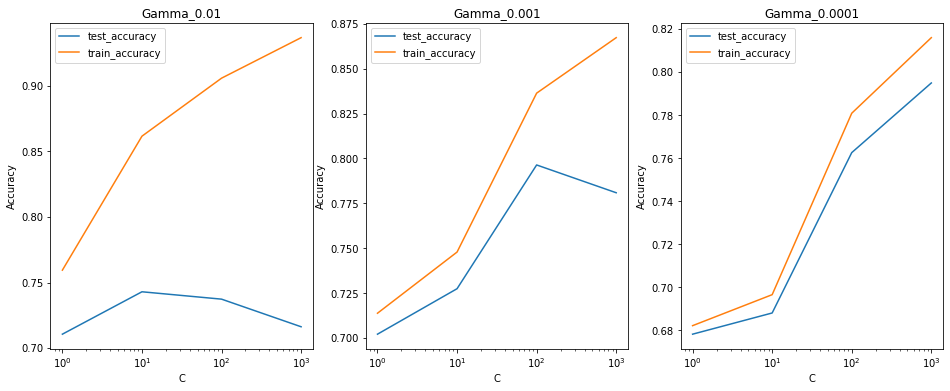

In [24]:
cv_results["param_C"]=cv_results["param_C"].astype('int')
#plotting
plt.figure(figsize=(16,6))
plt.subplot(131)
gamma_01=cv_results[cv_results["param_gamma"]==0.01]
plt.plot(gamma_01["param_C"],gamma_01['mean_test_score'])
plt.plot(gamma_01["param_C"],gamma_01['mean_train_score'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title('Gamma_0.01')
plt.legend(["test_accuracy",'train_accuracy'],loc="upper left")
plt.xscale("log")
#subplot 2/3
plt.subplot(132)
gamma_01=cv_results[cv_results["param_gamma"]==0.001]
plt.plot(gamma_01["param_C"],gamma_01['mean_test_score'])
plt.plot(gamma_01["param_C"],gamma_01['mean_train_score'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title('Gamma_0.001')
plt.legend(["test_accuracy",'train_accuracy'],loc="upper left")
plt.xscale("log")
#subplot 3/3
plt.subplot(133)
gamma_01=cv_results[cv_results["param_gamma"]==0.0001]
plt.plot(gamma_01["param_C"],gamma_01['mean_test_score'])
plt.plot(gamma_01["param_C"],gamma_01['mean_train_score'])
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title('Gamma_0.0001')
plt.legend(["test_accuracy",'train_accuracy'],loc="upper left")
plt.xscale("log")


In [25]:
#printing the optimal accuracy and hyperparameters
best_scores=model_cv.best_score_
best_hyperparams=model_cv.best_params_
print(f'score:{best_scores}\n best_hyperparameters:{best_hyperparams}')


score:0.796395154141633
 best_hyperparameters:{'C': 100, 'gamma': 0.001}


In [26]:
#building the final model
#specify the hyperparameters
best_params={"C":100,"gamma":0.001,"kernel":'rbf'}
#model
model=SVC(C=100,gamma=0.001,kernel="rbf")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred),"\n")
print("accuracy",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Sensitivity/Recall:",metrics.recall_score(y_test,y_pred))


[[87 17]
 [18 57]] 

accuracy 0.8044692737430168
Precision: 0.7702702702702703
Sensitivity/Recall: 0.76


In [27]:
test_data1=test_data

In [28]:
predictions=model.predict(test_data1)

In [29]:
data_test=pd.read_csv('../input/titanic/test.csv')

In [30]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
submission_file=pd.DataFrame({'PassengerId':data_test.PassengerId,'Survived':predictions})


In [32]:
submission_file.to_csv('submission.csv',index=False)
submission_file

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
